# Comparison of GC of species in Ensembl releases

<font color='red'>**Guide of usage**</font>

<font color='red'>**Final version do not edit - copy it**</font>

universal



Marta Vohnoutová, Radka Symonová

version 0.2

Changes:
    
    - dots in graphs - same density - adjasted to left
    - pick up chromosomes only - universal

## <font color='red'>1. Introduction</font>

### <font color='red'>1.1 Setup of environment</font>

This is the template to run your own setup of GC comparisons of species of your own.

1. **At first, you must create your environment.**

- **install Anaconda (description for linux Ubuntu v.22)**

$ sudo apt update

$ sudo apt install curl

$ curl --output anaconda.sh https://repo.anaconda.com/archive/Anaconda3-5.3.1-Linux-x86_64.sh

$ sha256sum Anaconda3-5.3.1-Linux-x86_64.sh

$ bash Anaconda3-5.3.1-Linux-x86_64.sh


2. **Create and activate your environment**

3. **Install necessary packages**

4. **Start Jupyter Notebook**

Go to the home directory, and start Juputer Notebook.

In Jupyter Notebook open this ipynb program teplate and copy it with a different name.

## <font color='red'>2.Import section</font>

In [168]:
#import pyensembl

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from collections import OrderedDict
from PIL import Image
from glob import glob

## <font color='red'>3.Configuration and download section</font>

### 3.1 Variable part - replace with right values

In [158]:
species = 'cottoperca_OIST' # replace with your animal
where_i_am = '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/' # replace with your path
where_is_fasta = '/home/rsymonova/Evan/Evan/isochores/' #replace with the path to fasta files
window = 1000  # sliding windows - you can change the window size
column_name = 'GC DNA' # replace with your column name
what_we_filter = 'not rec.id.isdigit()'

In [240]:
filesRS=!ls {where_is_fasta} | grep .fa  #replace grep with right filter
filesRS

['Anabas_OIST.fa',
 'Cottoperca_OIST.fa',
 'Danio.fa',
 'Esox.fa',
 'Lepisosteus.fa',
 'Petromyzon.fa',
 'Salmo.fa',
 'Xiphophorus.fa']

In [160]:
my_fasta_file=filesRS[1]  # replace with your choice

Choose what file you will work with / e.g. file_108[4] if the file is 'Cottoperca_gobio.fCotGob3.1.dna_sm.toplevel.fa'

#### Create subdirectory for particular species

In [161]:
try:
    os.mkdir(f'{where_i_am}{species}')
except OSError as error:
    pass

**Pyensembl only, if you do not have your data and want to download it**

### <font color='red'>Define the cache for downloaded files</font>

**Define the Ensembl release you want to work with**

Look at the .cache anf if not all required files are downloaded, you can do it manually with **wget**

Verify if you are in the directory with the animal e.g. in this case "cottoperca_gobio"

In [162]:
# where are you
!pwd

/mnt/data/radka/Evan/Vohnoutova_et_al2023


This file you must unzip it - see the example.

where = '/home/marta/.cache/pyensembl/fCotGob3.1/ensembl108/'

## <font color='red'>3.Parsing section</font>

# DNA only relese ..... - pandas table

## GC DNA release .....

In [163]:
sec_values = '' # replace with your release number
c=[]
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}", "fasta"):
    
    c.append(rec.id)
    sec_values += rec.seq
    
gc_values = tuple(gc_fraction(sec_values[i:i+window]) for i in range(0,len(sec_values),window)) # replace with your release number

columns_dna = [column_name] # replace with your name e.g. release number

gc_df_dna = pd.DataFrame(gc_values, columns = columns_dna) # replace with your release number

## GC soft and (small) and unmasked (capital) repetitions

## GC DNA release .....

In [172]:
GC_chromosoms=OrderedDict()
chomosome_no=0
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}", "fasta"):  # replace the path
    if eval(what_we_filter):  # chromosomes only
        soft_mask=sum(1 for i in rec.seq if i in 'acgt')
        ALL_all=sum(1 for i in rec.seq if i in 'acgtACGT')
        GC_fraction=gc_fraction(rec.seq)
        chomosome_no += 1
        GC_chromosoms[str(chomosome_no) + '+' + rec.id]=((GC_fraction,soft_mask/ALL_all),len(rec.seq))  # we distract N and n   

#all_images = sorted([os.path.basename(f) for f in glob(f"{where_i_am}{species}/*profile*.png")],key=lambda x: int(x.split('_')[-1].split('.')[0]))

GC_chromosoms = OrderedDict(sorted(GC_chromosoms.items(), key=lambda x: x[1][1],reverse=True))

In [173]:
GC_chromosoms # replace with your release number

OrderedDict([('5+ENA|LR131935|LR131935.1',
              ((0.40771028056836156, 0.26172963543221006), 30479438)),
             ('9+ENA|LR131939|LR131939.1',
              ((0.40867709843459904, 0.23503259514623812), 30072547)),
             ('3+ENA|LR131933|LR131933.1',
              ((0.4032972952361542, 0.24405482959290087), 30028995)),
             ('4+ENA|LR131934|LR131934.1',
              ((0.4064355195179001, 0.26340883704278506), 28949045)),
             ('13+ENA|LR131920|LR131920.1',
              ((0.40909998285626287, 0.2553741620635248), 27742916)),
             ('6+ENA|LR131936|LR131936.1',
              ((0.4092075763725821, 0.2419895700504481), 27680345)),
             ('10+ENA|LR131917|LR131917.1',
              ((0.40778491354275276, 0.2757633966163528), 27438269)),
             ('1+ENA|LR131916|LR131916.1',
              ((0.40814745909188405, 0.27957934285544367), 27055867)),
             ('16+ENA|LR131923|LR131923.1',
              ((0.40960814643715465, 0.233704779

In [174]:
with open(f'{where_i_am}{species}/{species}.csv','w') as f:  # name csv file as you wish 
    w = csv.writer(f)
    w.writerows(GC_chromosoms.items())

## Graph scatter - color by value

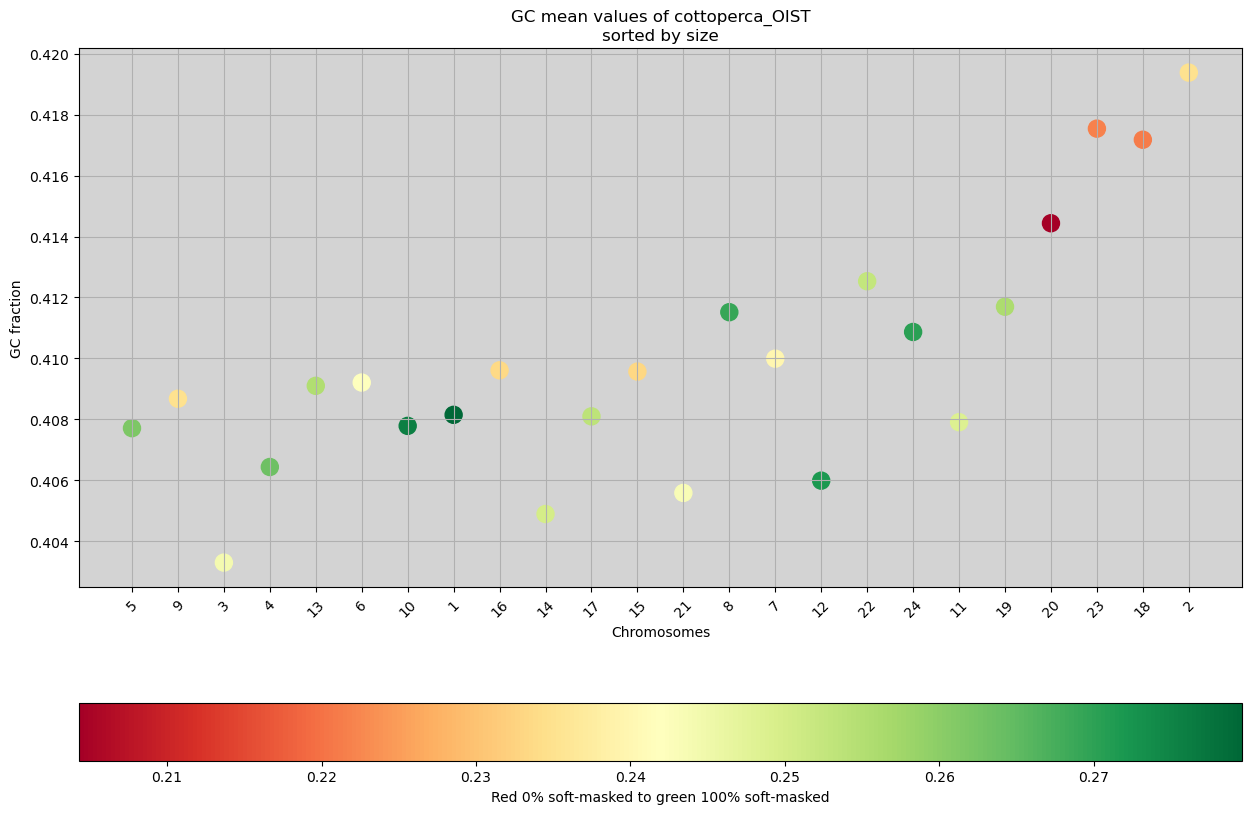

In [177]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.set_facecolor("lightgrey")       
#print(range(i,i+window),len(gc_values_94[i:i+window]))
        
names = list(i.split('+')[0] for i in GC_chromosoms.keys())
v = list(GC_chromosoms.values())
v1=[i[0][0] for i in v]
v2=[i[0][1] for i in v]

sc=ax1.scatter(names,v1, s=150, c=v2, cmap='RdYlGn', marker="o", ) # only GC fraction in y axe, only chromosomes
plt.grid(True)
plt.title(f'GC mean values of {species}\nsorted by size')  # Replace the animal name
plt.ylabel('GC fraction')
plt.xlabel('Chromosomes')
plt.xticks(rotation = 45)
plt.colorbar(sc,label="Red 0% soft-masked to green 100% soft-masked", orientation="horizontal")
plt.savefig(f'{where_i_am}{species}/soft_unmask_per_chromosomes_{species}.png')  # Replace the animal name
plt.show()

## Relations between release ..... and .... - whole sequence

### GC DNA release 94

Replace the path with your

### GC DNA release 108

In [178]:
sec_values = ''
c=[]
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}","fasta"): # replace the path
    sec_values += rec.seq
    
gc_all = gc_fraction(sec_values)

## Results - %GC rel.94 / %GC rel.108 (not here)

## Results - here %GC rel.108 only

In [179]:
#print(f'%GC release 94 is {gc_94_all}, %GC release 108 is {gc_108_all}, %GC rel.94 / %GC rel 108 is {gc_94_all/gc_108_all}')
print(f'%GC of {species} is {gc_all}')

%GC of cottoperca_OIST is 0.4092285307602729


### Soft vs Unmasked

In [180]:
gc_all.items()

dict_items([('cottoperca_OIST', (0.4092285307602729, 0.25015370660549935))])

### GC to ATGC, gc to atgc

comment what is not appropriate / here rel.94

In [181]:
GC_to_ATGC={}

atgc_lower=sum(1 for i in sec_values if i in 'atgc')
gc_lower=sum(1 for i in sec_values if i in 'gc')
atgc_upper=sum(1 for i in sec_values if i in 'ATGC')
gc_upper=sum(1 for i in sec_values if i in 'GC')

GC_to_ATGC['lower']=gc_lower/atgc_lower  # distract N and n, replace release no. 
GC_to_ATGC['upper']=gc_upper/atgc_upper  # distract N and n, replace release no.


In [189]:
GC_to_ATGC.items()

dict_items([('lower', 0.4023479510007686), ('upper', 0.4115239378931707)])

## GC soft and (small) and unmasked (capital) repetitions - by chromosomes

## GC DNA release ..... - by chromosomes

In [190]:
my_fasta_file  # Check if you choose right file

'Cottoperca_OIST.fa'

In [185]:
lengths=[]
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}", "fasta"): 
        lengths.append(len(rec.seq))
max_len=max(lengths)

In [191]:
print(max_len)

30479438


In [192]:
max_len//12000

2539

In [ ]:
# adjusted chromosome density
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}", "fasta"): # replace the path
    GC_chromosoms_windowed={}  # per chromosome
    if eval(what_we_filter):
        #print(rec.id)  
        for w in range(0,len(rec.seq),window):
              
            #print(range(i,i+window),len(gc_values_94[i:i+window]))
            soft_mask=sum(1 for i in rec.seq[w:w+window] if i in 'acgt')
            ALL_all=sum(1 for i in rec.seq[w:w+window] if i in 'acgtACGT')
            GC_fraction=gc_fraction(rec.seq[w:w+window])
            
            try:
                GC_chromosoms_windowed[str(w)+'|'+ rec.id]=(GC_fraction,soft_mask/ALL_all)  # distract N and n    
                #print(range(i,i+window),len(gc_values_94[i:i+window])) 
            except ZeroDivisionError:
                GC_chromosoms_windowed[str(w)+'|'+ rec.id]=(GC_fraction,0.0)  # distract N and n
            
        #fig = plt.figure(figsize=(int(50* (len(rec.seq)/max_len)),int(20* (len(rec.seq)/max_len))))
        fig = plt.figure(figsize=(50,20))
        ax1 = fig.add_subplot(111)
        ax1.set_facecolor("lightgrey")   
        
        names = list(GC_chromosoms_windowed.keys())
        
        v = list(GC_chromosoms_windowed.values())
        v1=[i[0] for i in v]
        v2=[i[1] for i in v]
        names_part=[n.split('|')[0] for n in names]
       
        sc=ax1.scatter(names_part,v1, s=5, c=v2, cmap='RdYlGn', marker="o", ) # only GC fraction in y axe, only chromosomes
        ax1.xaxis.set_ticks(np.arange(0, max_len//1000, max_len//12000))
        ax1.grid(True)        

        plt.title(f'GC% values of {species} - chromosome {rec.id}', fontsize = 35) # replace the animal name and release no.
        plt.ylabel('GC fraction', fontsize = 30)
        plt.xlabel(f'Chromosome {rec.id} windows', fontsize = 30)
        plt.xticks(fontsize = 30, rotation = 45)
        plt.yticks(fontsize = 30)
        plt.colorbar(sc,label="Red 0% soft-masked to green 100% soft-masked", orientation="horizontal")
        plt.savefig(f'{where_i_am}{species}/{species}_profile_soft_unmask_{rec.id}.png')  # replace the animal name and release no.
        plt.show()
        
        
        with open(f'{where_i_am}{species}/{species}_profile_soft_unmask_{rec.id}.csv','w') as f: # replace the animal name and release no.
            csv_file = csv.writer(f)
            csv_file.writerows(GC_chromosoms_windowed.items())
                 
        

## Merge all graph images 

#### Prepare small graphs without colorbars

In [ ]:
# adjusted chromosome density
for rec in SeqIO.parse(f"{where_is_fasta}{my_fasta_file}", "fasta"): # replace the path
    GC_chromosoms_windowed={}  # per chromosome
    if eval(what_we_filter):
        #print(rec.id)  
        for w in range(0,len(rec.seq),window):
              
            #print(range(i,i+window),len(gc_values_94[i:i+window]))
            soft_mask=sum(1 for i in rec.seq[w:w+window] if i in 'acgt')
            ALL_all=sum(1 for i in rec.seq[w:w+window] if i in 'acgtACGT')
            GC_fraction=gc_fraction(rec.seq[w:w+window])
            
            try:
                GC_chromosoms_windowed[str(w)+'|'+ rec.id]=(GC_fraction,soft_mask/ALL_all)  # distract N and n    
                #print(range(i,i+window),len(gc_values_94[i:i+window])) 
            except ZeroDivisionError:
                GC_chromosoms_windowed[str(w)+'|'+ rec.id]=(GC_fraction,0.0)  # distract N and n
            
        #fig = plt.figure(figsize=(int(50* (len(rec.seq)/max_len)),int(20* (len(rec.seq)/max_len))))
        fig = plt.figure(figsize=(25,10))
        ax1 = fig.add_subplot(111)
        
        names = list(GC_chromosoms_windowed.keys())
        v = list(GC_chromosoms_windowed.values())
        v1=[i[0] for i in v]
        v2=[i[1] for i in v]
        names_part=[n.split('|')[0] for n in names]
       
        sc=ax1.scatter(names_part,v1, s=5, c=v2, cmap='RdYlGn', marker="o", ) # only GC fraction in y axe, only chromosomes
        ax1.xaxis.set_ticks(np.arange(0, max_len//1000, max_len//12000))    
        plt.title(f'GC% values of {species} - chromosome {rec.id}', fontsize = 35) # replace the animal name and release no.        
        plt.savefig(f'{where_i_am}{species}/{species}_nobar_soft_unmask_{rec.id}.{len(rec.seq)}.png')  # replace the animal name and release no.
        plt.show()

#### Read graphs one by one and merge them all

In [234]:
# list of all graph images sorted to chromosomes no.
all_images = sorted([f for f in glob(f"{where_i_am}{species}/*nobar*.png")],key=lambda x: x.split('.')[-2], reverse = True)

In [235]:
all_images

['/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131933|LR131933.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131916|LR131916.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131920|LR131920.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131924|LR131924.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131935|LR131935.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131921|LR131921.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmask_ENA|LR131936|LR131936.1.png',
 '/home/rsymonova/Evan/Evan/Vohnoutova_et_al2023/cottoperca_OIST/cottoperca_OIST_nobar_soft_unmas

In [236]:
images = [Image.open(f"{x}") for x in all_images]
widths, heights = zip(*(i.size for i in images))
max_width = max(widths)
total_height = sum(heights)
new_im = Image.new('RGB', (max_width, total_height))

y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset,))
  y_offset += im.size[1]

new_im.save(f'{where_i_am}{species}/{species}_all_graphs.png')

#### Read small graphs one by one and merge them all to two columns

In [237]:
def get_concat(all_images,im_width,im_height):
    
    images = [Image.open(all_images[i]) for i in range(len(all_images))]
    if len(all_images)%2 == 0:
        how_high=len(all_images)
    else:
        how_high=len(all_images)+1
        
    dst = Image.new('RGB', (2*im_width, int((how_high * im_height)/2)))
    for i in range(0,len(images)+1,2):
        try:
            dst.paste(images[i], (0, int((i * im_height)/2)))
        except IndexError:
            pass
        try:            
            dst.paste(images[i+1], (im_width,  int((i * im_height)/2)))
        except IndexError:
            pass
    return dst

In [238]:
im = Image.open(all_images[0])
im_width=im.size[0]
im_height=im.size[1]
im.close()

In [239]:
get_concat(all_images,im_width,im_height).save(f'{where_i_am}{species}/{species}_all_small_graphs.png')

# Put all png images to pdf file

In the end all the files are put together into the pdf file.